## Análise da Criptomoeda XRP

Kaggle - https://www.kaggle.com/faushareef/cryptocurrencypricedata

Criado por Roberto Leptich - Data: 29/04/2021

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt
from chart_studio import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from platform import python_version

In [2]:
print('*'*40)
print('Python Version    : ', python_version())
print('Pandas Version    : ', pd.__version__)
print('Matplotlib Version: ', mpl.__version__)
print('Seaborn Version   : ', sns.__version__)
print('Plotly Version    : ', pt.__version__)
print('*'*40)

****************************************
Python Version    :  3.8.5
Pandas Version    :  1.1.3
Matplotlib Version:  3.3.2
Seaborn Version   :  0.11.0
Plotly Version    :  4.14.3
****************************************


In [3]:
# Abrindo o arquivo para analise
rippleUSD = pd.read_csv("ripple.csv")

# Colunas do Dataset
# Date       = Data da operacao
# Open       = Preço (USD) abertura
# High       = Maior Preço (USD) na Data
# Low        = Menor Preço (USD) na Data
# Close      = Preço (USD) no fechamento
# Volume     = Volume diario de Negociacao
# Market Cap = Capitalizacao de Mercado
# EMA10      = Media Movel Exponencial dos 10 Dias Anteriores
# EMA30      = Media Movel Exponencial dos 30 Dias Anteriores
# ATR        = Indicador de Alcance Real Medio

In [4]:
# Revertendo o indice
rippleUSD = rippleUSD.sort_index(axis=0 ,ascending=False)

In [5]:
# Mudando o tipo de Data da coluna Date 
rippleUSD['Date'] = pd.to_datetime(rippleUSD['Date'])

In [6]:
# Reindexing by Date
rippleUSD.index = rippleUSD['Date']

In [7]:
# Verifica o Shape do Dataset (Linhas e Colunas)
print('Shape', rippleUSD.shape)

Shape (2764, 10)


In [8]:
# Olhar primeiros 5 registros do DataSet
rippleUSD.head(5)

,Date,Open,High,Low,Close,Volume,Market Cap,EMA10,EMA30,ATR
Date,,,,,,,,,,
2021-02-26,2021-02-26,0.43,0.45,0.42,0.43,6.476254e+09,1.942839e+10,0.489225,0.468682,0.070588
2021-02-25,2021-02-25,0.47,0.48,0.43,0.43,5.952354e+09,1.972912e+10,0.502386,0.471350,0.073710
2021-02-24,2021-02-24,0.47,0.50,0.45,0.47,8.015469e+09,2.142305e+10,0.518472,0.474201,0.075534
2021-02-23,2021-02-23,0.57,0.57,0.38,0.47,1.435902e+10,2.150165e+10,0.529243,0.474491,0.077499
2021-02-22,2021-02-22,0.55,0.64,0.52,0.57,1.876924e+10,2.595935e+10,0.542409,0.474801,0.068845


In [9]:
# Olhar os 5 últimos registros do Dataset
rippleUSD.tail(5)

,Date,Open,High,Low,Close,Volume,Market Cap,EMA10,EMA30,ATR
Date,,,,,,,,,,
2013-08-08,2013-08-08,0.00,0.00,0.00,0.00,0.0,33258632.0,0.005477,0.008187,0.000616
2013-08-07,2013-08-07,0.00,0.00,0.00,0.00,0.0,34534121.0,0.006694,0.008751,0.000663
2013-08-06,2013-08-06,0.01,0.01,0.00,0.00,0.0,36591008.0,0.008182,0.009355,0.000714
2013-08-05,2013-08-05,0.01,0.01,0.01,0.01,0.0,43879157.0,0.010000,0.010000,0.000000
2013-08-04,2013-08-04,0.01,0.01,0.01,0.01,0.0,45983577.0,0.010000,0.010000,0.000000


In [10]:
# Dropar coluna Date pois foi colocada no index
rippleUSD.drop(columns=['Date'], inplace=True)

In [11]:
# Analisar tipos de dados das colunas e verificar valores ausentes
rippleUSD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2764 entries, 2021-02-26 to 2013-08-04
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2764 non-null   float64
 1   High        2764 non-null   float64
 2   Low         2764 non-null   float64
 3   Close       2764 non-null   float64
 4   Volume      2764 non-null   float64
 5   Market Cap  2764 non-null   float64
 6   EMA10       2764 non-null   float64
 7   EMA30       2764 non-null   float64
 8   ATR         2764 non-null   float64
dtypes: float64(9)
memory usage: 215.9 KB


In [12]:
rippleUSD.describe()

,Open,High,Low,Close,Volume,Market Cap,EMA10,EMA30,ATR
count,2764.000000,2764.000000,2764.000000,2764.000000,2.764000e+03,2.764000e+03,2.764000e+03,2764.000000,2764.000000
mean,0.202377,0.212062,0.192442,0.202500,9.415737e+08,8.201034e+09,2.017198e-01,0.200094,0.019324
std,0.297584,0.321484,0.274754,0.297597,2.435632e+09,1.182583e+10,2.893443e-01,0.273352,0.046707
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.196991e+07,2.290690e-07,0.000261,0.000000
25%,0.010000,0.010000,0.010000,0.010000,4.462918e+05,2.204146e+08,1.000000e-02,0.010000,0.000076
50%,0.150000,0.160000,0.140000,0.160000,5.017330e+07,6.183206e+09,1.607682e-01,0.140088,0.006154
75%,0.300000,0.310000,0.290000,0.300000,1.066043e+09,1.267280e+10,2.952393e-01,0.310046,0.018998
max,3.360000,3.840000,3.120000,3.380000,3.497423e+10,1.308535e+11,2.713340e+00,1.869336,0.453455


In [13]:
minPrice = rippleUSD['Close'].min()
maxPrice = rippleUSD['Close'].max()
minData  = rippleUSD[rippleUSD['Close'] == minPrice]
maxData  = rippleUSD[rippleUSD['Close'] == maxPrice]

print('RIPPLE Menor Preço: ', minPrice)
print('RIPPLE Valor Preço: ', maxPrice)

RIPPLE Menor Preço:  0.0
RIPPLE Valor Preço:  3.38


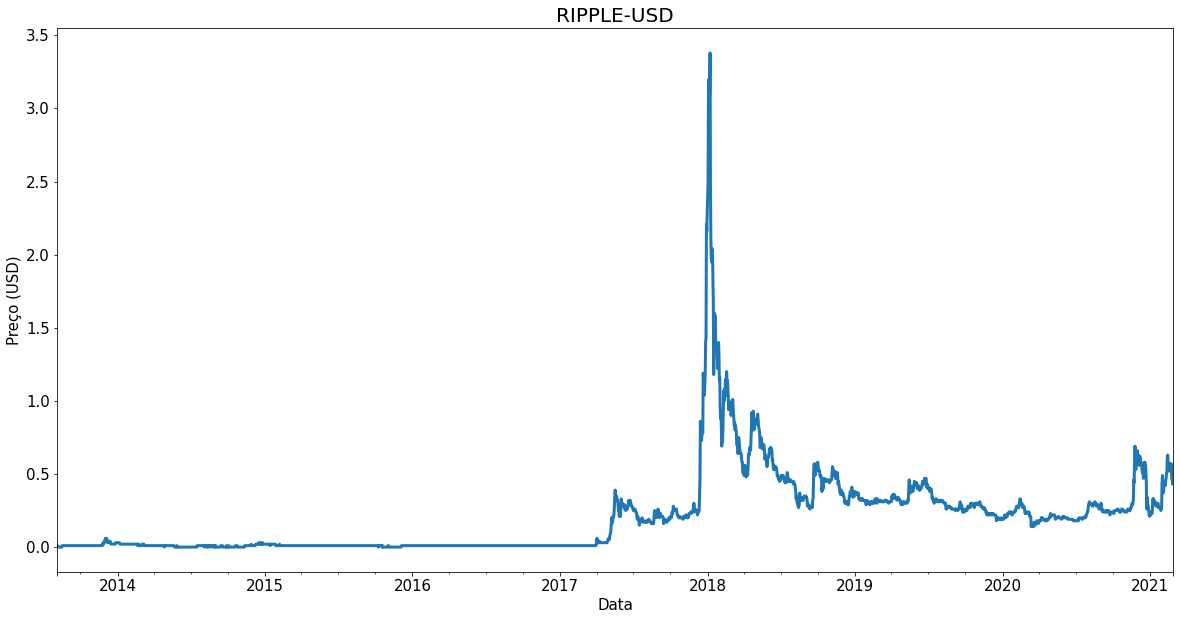

In [14]:
# Grafico do crescimento do Preço ao longo do tempo
plt.figure(figsize=(20,10))
rippleUSD['Close'].plot(linewidth = 3)
plt.ylabel('Preço (USD)', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Data', fontsize=15)
plt.xticks(fontsize=15)
plt.title('RIPPLE-USD', fontsize=20)
plt.show()

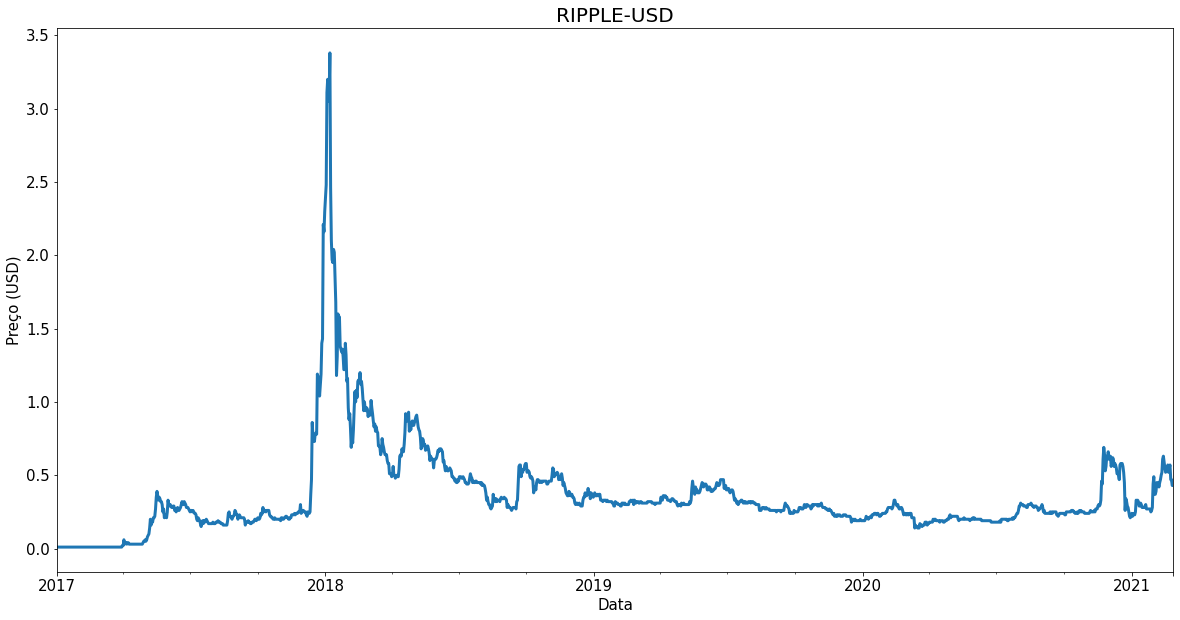

In [15]:
# Grafico do crescimento do Preço ao longo do tempo (Descartando dados de 2014 ao final 2016)
plt.figure(figsize=(20,10))
rippleUSD['2021-02-26':'2017-01-01'].Close.plot(linewidth = 3)
plt.ylabel('Preço (USD)', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Data', fontsize=15)
plt.xticks(fontsize=15)
plt.title('RIPPLE-USD', fontsize=20)
plt.show()

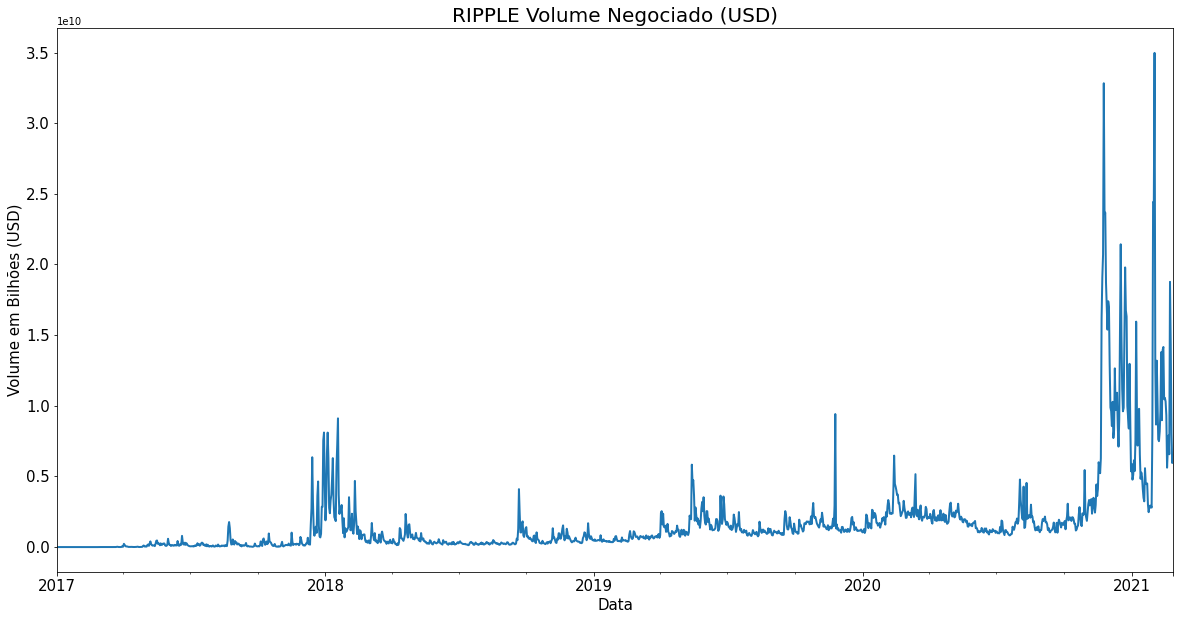

In [16]:
# Volume (bilhoes de dolares) ao longo do tempo
plt.figure(figsize=(20,10))
rippleUSD['2021-02-26':'2017-01-01'].Volume.plot(linewidth = 2)
plt.ylabel('Volume em Bilhões (USD)', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Data', fontsize=15)
plt.xticks(fontsize=15)
plt.title('RIPPLE Volume Negociado (USD)', fontsize=20)
plt.show()

In [17]:
# Analise do Candlestick no mes Fev 2021
trace = go.Candlestick(x=rippleUSD['2021-02-26':'2021-02-01'].index,
                open=rippleUSD['2021-02-26':'2021-02-01'].Open,
                high=rippleUSD['2021-02-26':'2021-02-01'].High,
                low=rippleUSD['2021-02-26':'2021-02-01'].Low,
                close=rippleUSD['2021-02-26':'2021-02-01'].Close)

layout = go.Layout(
    title='RIPPLE Candlestick Feb 2021',
    xaxis=dict(
        title='Tempo',
        titlefont=dict(
            family='Arial, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Preço (USD)',
        titlefont=dict(
            family='Arial, monospace',
            size=18,
            color='#7f7f7f'
        )))
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='RIPPLE Candlestick Feb 2021')

In [18]:
# Maior valor de fechamento - Data da ocorrência
display(maxData)

,Open,High,Low,Close,Volume,Market Cap,EMA10,EMA30,ATR
Date,,,,,,,,,
2018-01-07,3.09,3.49,3.08,3.38,2.395150e+09,1.308535e+11,2.71334,1.766995,0.362024


In [19]:
# Analise do mês Janeiro-2018 onde ocorreu o maior valor de fechamento RIPPLE
trace = go.Candlestick(x=rippleUSD['2018-01-31':'2018-01-01'].index,
                open=rippleUSD['2018-01-31':'2018-01-01'].Open,
                high=rippleUSD['2018-01-31':'2018-01-01'].High,
                low=rippleUSD['2018-01-31':'2018-01-01'].Low,
                close=rippleUSD['2018-01-31':'2018-01-01'].Close)

layout = go.Layout(
    title='RIPPLE Candlestick Jan 2018',
    xaxis=dict(
        title='Tempo',
        titlefont=dict(
            family='Arial, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Preço (USD)',
        titlefont=dict(
            family='Arial, monospace',
            size=18,
            color='#7f7f7f'
        )))
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='RIPPLE Candlestick Jan 2018')

In [20]:
#ripple Volume vs USD visualization
trace = go.Scattergl(
    y = rippleUSD['Volume'].astype(float),
    x = rippleUSD['Close'].astype(float),
    mode = 'markers',
    marker = dict(
        color = '#00a1a1',
        line = dict(width = 1)))

layout = go.Layout(
    title='RIPPLE - Volume x USD',
    xaxis=dict(
        title='Preço Fechamento (USD)',
        titlefont=dict(
            family='Arial, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title=' Volume Diário ',
        titlefont=dict(
            family='Arial, monospace',
            size=18,
            color='#7f7f7f'
        )))
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='compareVolumeUsd')

In [21]:
maxHigh = rippleUSD['High'].max()
maxDataHigh  = rippleUSD[rippleUSD['High'] == maxHigh]

display(maxDataHigh)

,Open,High,Low,Close,Volume,Market Cap,EMA10,EMA30,ATR
Date,,,,,,,,,
2018-01-04,3.12,3.84,3.12,3.2,8.103660e+09,1.238347e+11,2.314919,1.453864,0.338718


#### Algumas conclusões:

1. A Ripple apesar de iniciar praticamente em 2014, começou a ter movimentações expressivas em termos de valor, em 2017,
atigindo seu maior preço de fechamento em  07 de Janeiro de 2018 (US$ 3.38)

2. No final de 2020 a cryptomoeda começou a ter um volume diário significativo, atigindo a marca de 3.5 bilhões de Doláres.

3. Apesar da alta recente, a Ripple ainda está abaixo da sua máxima histórica de US$ 3.84, cravada no dia 4 de janeiro de 2018.